## Task - 1 Prediction Using Supervised ML

### Developed By Navneet Dhamal

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as snf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv("F:/NAVNEET/Internship/Sparks Foundation/Task - 1/student.csv")

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploratory Data Analysis

In [6]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Outlier Removal

In [11]:
def null_detection(data):
    num_cols = []
    
    count = 0
    t = []
    for i in num_cols:
        z = np.abs(stats.zscore(data[i]))
        for j in range(len(z)):
            if z[j] > 3 or z[j] <- 3:
                t.append(j)
                count+=1
    data = data.drop(list(set(t)))
    data = data.reset_index()
    data = data.drop('index', axis=1)
    print(count)
    return data        

In [12]:
data = null_detection(data)

0


### Distribution

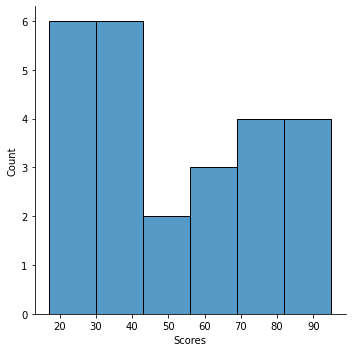

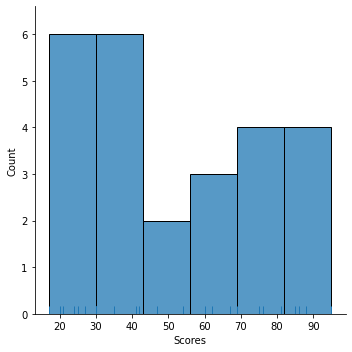

In [13]:
sns.displot(data["Scores"])
plt.show()

sns.displot(data["Scores"], kde=False, rug=True)
plt.show()

## Performing Simple Linear Regression

### Calculating the coefficients of the simple linear regression equation y = B0 + B1.x(B1: Slope , B0 :Intercept)

In [16]:
mean_x = np.mean(data['Hours'])
mean_y = np.mean(data['Scores'])
num = 0
den = 0
x = list(data['Hours'])
y = list(data['Scores'])
for i in range(len(data)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den

In [17]:
B1

9.775803390787475

In [18]:
B0 = mean_y - B1*mean_x

In [19]:
B0

2.4836734053731746

### Making Predictions

In [21]:
data['predicted_Scores'] = B0 + B1*data['Hours']

In [22]:
data.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

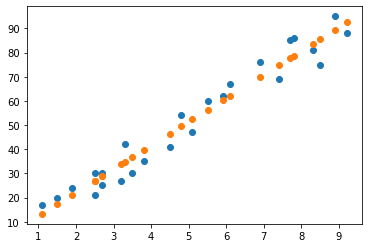

In [25]:
plt.scatter(data['Hours'], data['Scores'])
plt.scatter(data['Hours'], data['predicted_Scores'])
plt.plot()

### Prediction of given values 9.25

In [26]:
B0 + B1*9.25

92.90985477015732

In [27]:
y = list(data['Scores'].values)
y_pred = list(data['predicted_Scores'].values)

### RMSE

In [29]:
s = sum([(y_pred[i] - y[i])**2 for i in range(len(data))])
rmse = (np.sqrt(s/len(data)))/mean_y

In [30]:
rmse

0.10439521325937494

### OLS Model

In [35]:
model = snf.ols('Scores ~ Hours', data = data)
model = model.fit()

In [36]:
data['pred_ols'] = model.predict(data['Hours'])

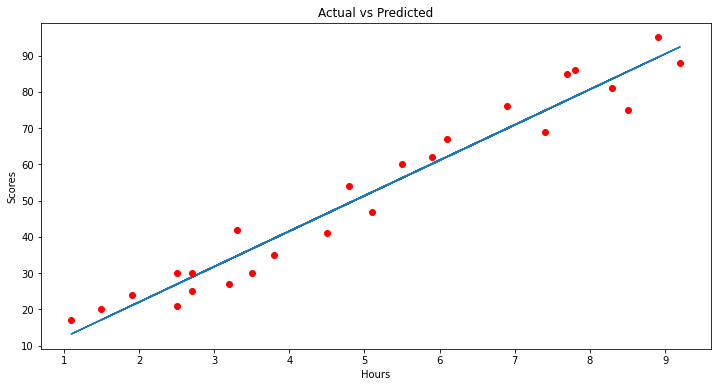

In [37]:
plt.figure(figsize=(12,6))
plt.plot(data['Hours'],data['pred_ols'])
plt.plot(data['Hours'],data['Scores'], 'ro')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

### We can observe that the predicted value for 9.25 hours is around 92

## Additional Conclusions : Categorial Prediction

In [38]:
cut_off = 40

In [39]:
data['Passed'] = data['Scores']>=40

In [40]:
data.head()

,Hours,Scores,predicted_Scores,pred_ols,Passed
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


## Plotting the given Data's Results

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passed', ylabel='count'>

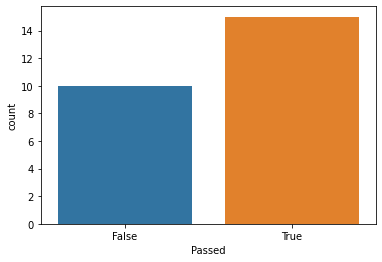

In [41]:
sns.countplot(data['Passed'])

## Feature Engineering

In [42]:
feature = data['Hours'].values.reshape(-1, 1)
target = data['Passed'].values

## Splitting The Data

In [43]:
x_train,x_test,y_train,y_test = train_test_split(feature, target, random_state=0)

## Training The KNN Model

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

## Accuracy

In [45]:
knn.score(x_train,y_train)

0.9444444444444444

## Predicting The Outcomes

In [1]:
get_results = [[9.25]]

In [47]:
knn.predict(get_results)

array([ True])

In [48]:
knn.predict([[14]])

array([ True])

In [49]:
knn.predict([[3]])

array([False])

## Thank You